# 天池数据挖掘大赛 | 淘宝购物推荐预测

## 一、数据分析

### 导入所需包

In [1]:
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import pandas as pd 
import datetime
from __future__ import division #精确除法

### 导入原始数据

In [2]:
#import csv
df1 = pd.read_csv('fresh_comp_offline/tianchi_fresh_comp_train_user.csv');
df2 = pd.read_csv('fresh_comp_offline/tianchi_fresh_comp_train_item.csv');

### 基本分析

#### 参与用户数，参与商品数， 头部商品数

In [4]:
#basic analusis
#total users
total_user = len(df1['user_id'].value_counts().index);
#total items
total_item = len(df1['item_id'].value_counts().index);
#predict items
pre_item = len(df2['item_id'].value_counts().index);
total_user, total_item, pre_item

(20000, 4758484, 422858)

#### 预测日（2014-12-18）之前每日的购买量分布

//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


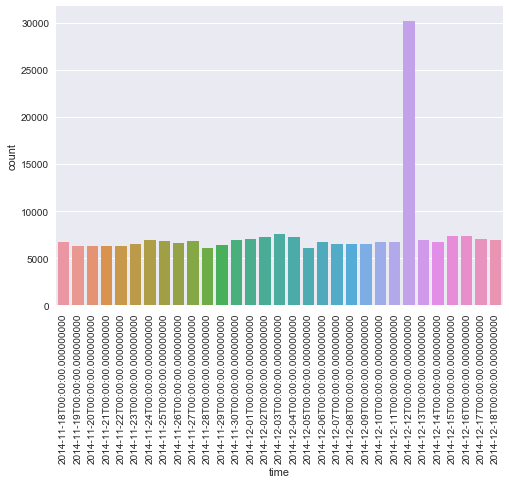

In [10]:
df1_par = df1.loc[df1.behavior_type==4];
df1_par.time = pd.to_datetime(df1_par.time).values.astype('datetime64[D]');
df1_par.set_index('time', drop=False, append=False, inplace=True, verify_integrity=False);
df1_par = df1_par.sort_index();
g1 = sns.countplot(x='time', data=df1_par);
g1.set_xticklabels(g1.get_xticklabels(), rotation=90);

#### 销量TOP100的商品分类

In [11]:
df1_par.item_category.value_counts().sort_values(ascending=False).iloc[0:100]

6344     4454
1863     3647
5232     3049
7957     2256
6513     2195
8877     2192
3472     2145
10392    1920
1838     1861
3424     1850
5399     1814
9516     1803
13230    1753
5027     1694
5894     1690
10894    1678
6977     1675
4370     1524
11279    1285
11824    1256
3628     1228
3064     1174
11537    1172
2993     1162
2825     1154
2901     1138
3673     1134
11623    1089
7767     1088
552      1012
         ... 
12067     573
9517      549
10961     548
10661     547
9614      545
12855     536
9261      533
6255      529
5751      525
9247      514
12753     494
13926     480
6576      471
8864      466
10703     465
11178     465
8586      463
8010      463
8874      449
4676      448
13338     448
2950      446
5395      446
292       442
8095      438
5550      433
675       432
7440      425
5388      422
12328     417
Name: item_category, Length: 100, dtype: int64

销量TOP100的地理位置

In [12]:
df1_par.user_geohash.value_counts().sort_values(ascending=False).iloc[0:100]

mtog5dr    11
9rnfjat    11
mtog5db    10
9rnfjau    10
9rg11ct     8
94mnr5v     8
9rnfje7     8
9rnfja3     8
9rnfjek     8
9rnfjab     8
9rgqteu     7
9rnfje9     7
9rnfjep     7
9rnfjeq     7
9rnfjet     7
9rnfjeh     7
9rnfjdi     7
9rnfjeb     7
9rnfjaa     7
9r7kulj     7
mtokl7e     7
mtog5d9     7
mtoklhh     7
95w9i3v     6
9rfrpf5     6
9rnfjav     6
99nf2b9     6
95f13vv     6
9rg11ck     6
95f6vgg     6
           ..
95b757n     5
9506aho     5
9rfrpdd     5
99dm7dv     5
9r7kud9     5
95w9i2m     5
97oki20     5
94rlwp2     5
95uqtju     5
mtog5dq     5
mt5pb1n     5
94rlwpe     5
94rkco3     5
97lncgt     5
97lncg3     5
9r5f4jg     5
9rg11ci     5
9qt7q79     5
9r2tmvr     5
96sjo7d     5
mtokl7a     5
95q65cn     5
943wq4f     5
mtokl7j     5
9rnfja2     5
94rwihk     5
954aoib     5
94a25pe     5
ffed1po     5
9rf9pnn     5
Name: user_geohash, Length: 100, dtype: int64

#### 各行为的购买概率随时间衰减变化

In [3]:
df1_da = df1.loc[:, ['user_id', 'item_id', 'behavior_type', 'time']];
df1_da.time = pd.to_datetime(df1_da.time);
df1_da.time = df1_da.time.values.astype('datetime64[D]'); #fentch date only
df1_da1 = df1_da;
final_date = pd.Timestamp('2014-12-18 00:00:00');
df1_da1.time = df1_da1.time.sub(final_date).mul(-1);

s_click = (df1_da1.behavior_type==1);
s_collec = (df1_da1.behavior_type==2);
s_cart = (df1_da1.behavior_type==3);
s_buy = (df1_da1.behavior_type==4);
d1 = {'click':s_click, 'collection':s_collec, 'cart':s_cart, 'buy':s_buy};
df1_add1 = pd.DataFrame(d1);
df1_tol1 = pd.concat([df1_da1, df1_add1], axis=1);
df1_tol1.set_index(['user_id', 'item_id'], drop=True, append=False, inplace=True, verify_integrity=False);

s_buy1218 = ((df1_da1.time==pd.tslib.Timedelta('0 days 00:00:00')) & (df1_da1.behavior_type==4));
d2 = {'buy1218':s_buy1218};
df1_add2 = pd.DataFrame(d2);
df1_tol2 = pd.concat([df1_da1, df1_add2], axis=1);
df1_tol2.drop(['time', 'behavior_type'], axis=1, inplace=True);
df1_tol2 = df1_tol2.loc[df1_tol2.buy1218==True];
df1_tol2.set_index(['user_id', 'item_id'], drop=True, append=False, inplace=True, verify_integrity=False);

df1_tol = df1_tol1.join(df1_tol2).fillna(False); #review join/merge/concat!

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timedelta as pandas.Timedelta


#### 1）用户在预测日（2014-12-18）之前天数点击过且在预测日购买某商品的概率

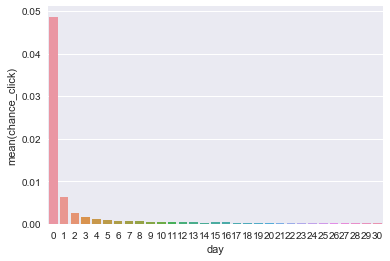

In [70]:
chance_click = [0]*31;
for i in range(0,31):
    hit = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.click==True) & (df1_tol.buy1218==True)].value_counts(dropna=False).sum();
    total = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.click==True)].value_counts(dropna=False).sum();
    chance_click[i] = hit/total;
dic_click = {'chance_click':chance_click, 'day':range(0, 31)};
df1_click = pd.DataFrame(dic_click);
sns.barplot(x='day', y='chance_click', data=df1_click);

#### 2）用户在预测日（2014-12-18）之前天数收藏过且在预测日购买某商品的概率

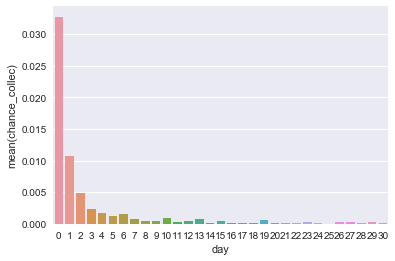

In [71]:
chance_collec = [0]*31;
for i in range(0,31):
	hit = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.collection==True) & (df1_tol.buy1218==True)].value_counts(dropna=False).sum();
	total = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.collection==True)].value_counts(dropna=False).sum();
	chance_collec[i] = hit/total;
dic_collec = {'chance_collec':chance_collec, 'day':range(0, 31)};
df1_collec = pd.DataFrame(dic_collec);
sns.barplot(x='day', y='chance_collec', data=df1_collec);

#### 3）用户在预测日（2014-12-18）之前天数加入过购物车且在预测日购买某商品的概率

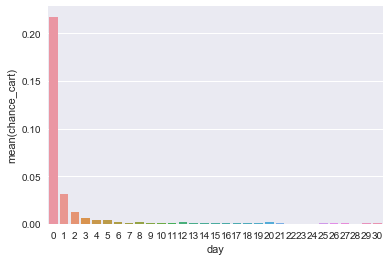

In [72]:
chance_cart = [0]*31;
for i in range(0,31):
	hit = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.cart==True) & (df1_tol.buy1218==True)].value_counts(dropna=False).sum();
	total = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.cart==True)].value_counts(dropna=False).sum();
	chance_cart[i] = hit/total;
dic_cart = {'chance_cart':chance_cart, 'day':range(0, 31)};
df1_cart = pd.DataFrame(dic_cart);
sns.barplot(x='day', y='chance_cart', data=df1_cart);

#### 4）用户在预测日（2014-12-18）之前天数购买过且在预测日购买某商品的概率（已做log处理）

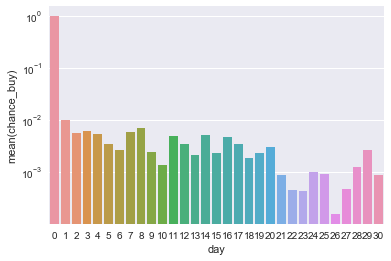

In [73]:
chance_buy = [0]*31;
for i in range(0,31):
	hit = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.buy==True) & (df1_tol.buy1218==True)].value_counts(dropna=False).sum();
	total = df1_tol.buy1218.loc[(df1_tol.time==pd.tslib.Timedelta(str(i)+' days 00:00:00')) & (df1_tol.buy==True)].value_counts(dropna=False).sum();
	chance_buy[i] = hit/total;
dic_buy = {'chance_buy':chance_buy, 'day':range(0, 31)};
df1_buy = pd.DataFrame(dic_buy);
g4 = sns.barplot(x='day', y='chance_buy', data=df1_buy);
g4.set_yscale('log')

#### 预测日（2014-12-18）前一天各行为次数与预测日购买概率

In [4]:
df1_da2 = df1_da;
df1_add3 = pd.DataFrame(d1);
df1_tol3 = pd.concat([df1_da2, df1_add3], axis=1);
df1_tol3.drop(['behavior_type'], axis=1, inplace=True);
df1_tol3_gp = df1_tol3.groupby(['user_id', 'item_id', 'time']).sum(); #count and delete duplication

df1_tol4 = df1_tol3.drop(['click', 'collection', 'cart'], axis=1, inplace=False);
one_day = pd.Series(np.array([pd.tslib.Timedelta('1 days 00:00:00')]*len(df1_tol4)));
df1_tol4.time = df1_tol4.time - one_day;
df1_tol4_gp = df1_tol4.groupby(['user_id', 'item_id', 'time']).sum();
df1_tol4_gp.buy = (df1_tol4_gp.buy!=0);

df1_tol_gp = df1_tol3_gp.join(df1_tol4_gp, rsuffix='_next_day'); #know the meaning of buy_next_day=True/False/NaN
df1_tol_gp.loc[:, 'buy_next_day'].fillna(False, inplace=True);

#### 1）用户在预测日（2014-12-18）前一天的点击次数与在预测日购买该商品的概率

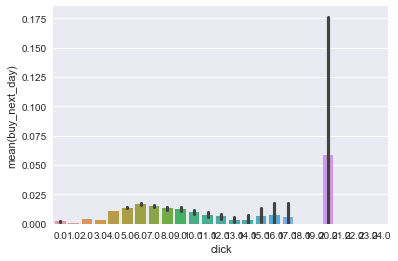

In [80]:
sns.barplot(x='click', y='buy_next_day', data=df1_tol_gp);

#### 2）用户在预测日（2014-12-18）前一天的收藏次数与在预测日购买该商品的概率

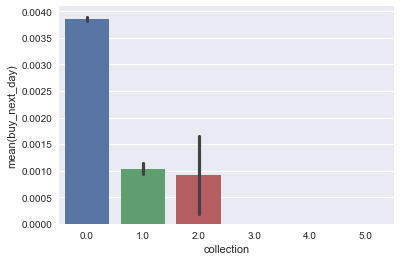

In [81]:
sns.barplot(x='collection', y='buy_next_day', data=df1_tol_gp);

#### 3）用户在预测日（2014-12-18）前一天的加入购物车次数与在预测日购买该商品的概率

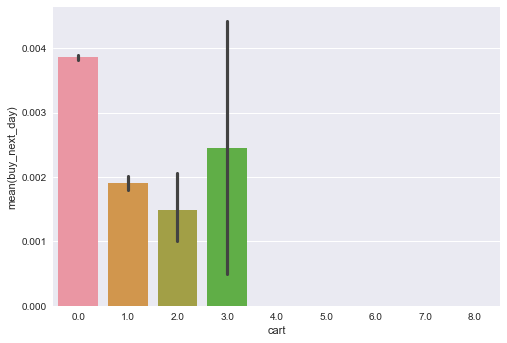

In [5]:
sns.barplot(x='cart', y='buy_next_day', data=df1_tol_gp);

#### 4）用户在预测日（2014-12-18）前一天的购买次数与在预测日购买该商品的概率

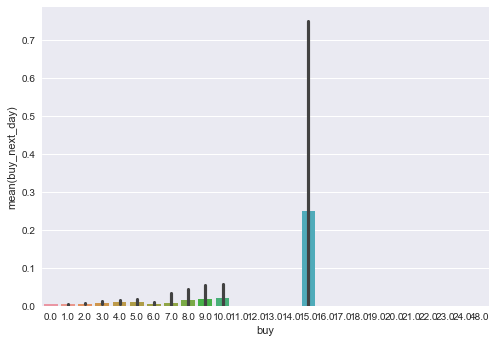

In [6]:
sns.barplot(x='buy', y='buy_next_day', data=df1_tol_gp);